<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/1105_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_03_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **<font color='orange'> Phase 1. 데이터수집 단계**
### **1. 엑셀 시트를 읽고 파케이(parquet)형태로 저장하기**

#### **1.1. 20개 시트를 parquet로 나누어 저장하기**

### **<font color='orange'> Phase 2. 분석단계**

In [ ]:
# prompt: import warning
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
path = '/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

### **<font color='orange'> Phase 3. 본문에서 단어추출 후 분석단계**

In [ ]:
import pandas as pd
df = pd.read_pickle(path).sample(frac=0.1)
df

,일자,본문
327,2024-09-30,대전시는 9월 대한민국 광역자치단체 브랜드평판에서 1위를 차지하며 4개월 연속 전국...
2698,2024-09-11,‘지방의회법 제정과 지방의회 강화’ 토론회가 11일 국회도서관 대강당에서 민지회(더...
11989,2024-08-11,[이투데이] 배근미 기자 (athena3507@etoday.co.kr)\n\n 11...
31740,2024-08-14,세종//아시아투데이 이정연 기자 = 원스톱 수출 수주지원단이 디지털헬스케어 분야 수...
25782,2024-09-11,[머니투데이 뉴욕=박준식 특파원] 미국 대선후보 첫 TV토론 진행 중 미국 ABC뉴...
...,...,...
22714,2024-08-09,가천대학교가 9일 교육부 발표 ‘2024년 대학혁신지원사업 2차연도 성과평가’에서 ...
11658,2024-10-05,[이데일리 김형환 김세연 정윤지 기자] “한국에서 이런 걸 볼 수 있다니 종일 기다...
4897,2024-09-07,용인특례시는 지난 6일 스웨덴 의회 보건복지위원회 대표단과 주한 스웨덴 대사관 관계...
7553,2024-08-20,올해 창립 100주년을 맞은 삼양그룹의 김윤(사진) 회장이 글로벌 스페셜티(고부가가...


In [ ]:
! pip install konlpy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 23.7 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_single_article(article): # Define a function for single articles
    clean_article = re.sub(r'[^\w\s]', '', str(article))
    nouns = okt.nouns(clean_article)
    filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
    return filtered_nouns

df['추출단어'] = df['본문'].apply(extract_words_from_single_article)
df

,일자,본문,추출단어
327,2024-09-30,대전시는 9월 대한민국 광역자치단체 브랜드평판에서 1위를 차지하며 4개월 연속 전국...,"[전시, 대한민국, 광역, 자치, 단체, 브랜드, 평판, 차지, 개월, 연속, 전국..."
2698,2024-09-11,‘지방의회법 제정과 지방의회 강화’ 토론회가 11일 국회도서관 대강당에서 민지회(더...,"[지방의회, 제정, 지방의회, 강화, 토론회, 국회, 도서관, 대강, 민지, 민주당..."
11989,2024-08-11,[이투데이] 배근미 기자 (athena3507@etoday.co.kr)\n\n 11...,"[이투데이, 배근, 기자, 번가, 미정, 고객, 약속, 업체, 홍보, 안심, 정산,..."
31740,2024-08-14,세종//아시아투데이 이정연 기자 = 원스톱 수출 수주지원단이 디지털헬스케어 분야 수...,"[세종, 아시아, 투데이, 이정연, 기자, 원스톱, 수출, 주지, 원단, 디지털, ..."
25782,2024-09-11,[머니투데이 뉴욕=박준식 특파원] 미국 대선후보 첫 TV토론 진행 중 미국 ABC뉴...,"[머니투데이, 뉴욕, 박준식, 특파원, 미국, 대선, 후보, 토론, 진행, 미국, ..."
...,...,...,...
22714,2024-08-09,가천대학교가 9일 교육부 발표 ‘2024년 대학혁신지원사업 2차연도 성과평가’에서 ...,"[가천대, 학교, 교육부, 발표, 대학, 혁신, 지원, 사업, 차연, 성과, 평가,..."
11658,2024-10-05,[이데일리 김형환 김세연 정윤지 기자] “한국에서 이런 걸 볼 수 있다니 종일 기다...,"[이데일리, 김형환, 김세연, 정윤, 기자, 한국, 종일, 보람, 오후, 서울, 세..."
4897,2024-09-07,용인특례시는 지난 6일 스웨덴 의회 보건복지위원회 대표단과 주한 스웨덴 대사관 관계...,"[용인, 특례시, 스웨덴, 의회, 보건, 복지, 위원회, 대표, 주한, 스웨덴, 대..."
7553,2024-08-20,올해 창립 100주년을 맞은 삼양그룹의 김윤(사진) 회장이 글로벌 스페셜티(고부가가...,"[올해, 창립, 주년, 그룹, 윤사, 회장, 글로벌, 스페셜, 부가가치, 중심, 사..."


In [ ]:
# Join the list of words into a single string for each document
df['추출단어_str'] = df['추출단어'].apply(lambda x: ' '.join(x))
# 인덱스 생성
df.index = range(len(df))
df

,일자,본문,추출단어,추출단어_str
0,2024-09-30,대전시는 9월 대한민국 광역자치단체 브랜드평판에서 1위를 차지하며 4개월 연속 전국...,"[전시, 대한민국, 광역, 자치, 단체, 브랜드, 평판, 차지, 개월, 연속, 전국...",전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한국 기업 평...
1,2024-09-11,‘지방의회법 제정과 지방의회 강화’ 토론회가 11일 국회도서관 대강당에서 민지회(더...,"[지방의회, 제정, 지방의회, 강화, 토론회, 국회, 도서관, 대강, 민지, 민주당...",지방의회 제정 지방의회 강화 토론회 국회 도서관 대강 민지 민주당 지방 의원 출신 ...
2,2024-08-11,[이투데이] 배근미 기자 (athena3507@etoday.co.kr)\n\n 11...,"[이투데이, 배근, 기자, 번가, 미정, 고객, 약속, 업체, 홍보, 안심, 정산,...",이투데이 배근 기자 번가 미정 고객 약속 업체 홍보 안심 정산 서비스 홈플러스 온라...
3,2024-08-14,세종//아시아투데이 이정연 기자 = 원스톱 수출 수주지원단이 디지털헬스케어 분야 수...,"[세종, 아시아, 투데이, 이정연, 기자, 원스톱, 수출, 주지, 원단, 디지털, ...",세종 아시아 투데이 이정연 기자 원스톱 수출 주지 원단 디지털 스케 분야 수출 애로...
4,2024-09-11,[머니투데이 뉴욕=박준식 특파원] 미국 대선후보 첫 TV토론 진행 중 미국 ABC뉴...,"[머니투데이, 뉴욕, 박준식, 특파원, 미국, 대선, 후보, 토론, 진행, 미국, ...",머니투데이 뉴욕 박준식 특파원 미국 대선 후보 토론 진행 미국 뉴스 주최 카멀 해리...
...,...,...,...,...
1776,2024-08-09,가천대학교가 9일 교육부 발표 ‘2024년 대학혁신지원사업 2차연도 성과평가’에서 ...,"[가천대, 학교, 교육부, 발표, 대학, 혁신, 지원, 사업, 차연, 성과, 평가,...",가천대 학교 교육부 발표 대학 혁신 지원 사업 차연 성과 평가 교육 혁신 전략 분야...
1777,2024-10-05,[이데일리 김형환 김세연 정윤지 기자] “한국에서 이런 걸 볼 수 있다니 종일 기다...,"[이데일리, 김형환, 김세연, 정윤, 기자, 한국, 종일, 보람, 오후, 서울, 세...",이데일리 김형환 김세연 정윤 기자 한국 종일 보람 오후 서울 세계 불꽃 축제 시작 ...
1778,2024-09-07,용인특례시는 지난 6일 스웨덴 의회 보건복지위원회 대표단과 주한 스웨덴 대사관 관계...,"[용인, 특례시, 스웨덴, 의회, 보건, 복지, 위원회, 대표, 주한, 스웨덴, 대...",용인 특례시 스웨덴 의회 보건 복지 위원회 대표 주한 스웨덴 대사관 관계자 시청 방...
1779,2024-08-20,올해 창립 100주년을 맞은 삼양그룹의 김윤(사진) 회장이 글로벌 스페셜티(고부가가...,"[올해, 창립, 주년, 그룹, 윤사, 회장, 글로벌, 스페셜, 부가가치, 중심, 사...",올해 창립 주년 그룹 윤사 회장 글로벌 스페셜 부가가치 중심 사업 포트폴리오 전략 ...


### **Corpus 추출방법**
#### 2가지 방법

In [ ]:
# prompt: 추출단어_str 를 리스트 corpus로 만들기
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html --> corpus와 같은 형태
#
corpus = df['추출단어_str'].tolist()
corpus[:10]

['전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한국 기업 평판 연구소 대한민국 광역 자치 단체 브랜드 평판 조사 결과 전시 서울시 제주도 각각 이번 조사 한국 기업 평판 연구소',
 '지방의회 제정 지방의회 강화 토론회 국회 도서관 대강 민지 민주당 지방 의원 출신 국회의원 모임 민주당 전국 기초 의원 협의 민주당 전국 광역의회 의원 협의 주최 토론회 지방의회 지방 차지 중심 권한 역할 방안 마련 위해 마련 부활 지방의회 지방자치법',
 '이투데이 배근 기자 번가 미정 고객 약속 업체 홍보 안심 정산 서비스 홈플러스 온라인 롯데 신규 셀러 수수료 면제 마켓 지원 이용자 대상 혜택 플랫폼 이동 고객 추가 포인트 제공 당장 지각 변동 수요 이해당사자 신뢰',
 '세종 아시아 투데이 이정연 기자 원스톱 수출 주지 원단 디지털 스케 분야 수출 애로 해소 원단 서울 중구 국가 통합 바이오 빅데이터 구축 사업 관계 기관 디지털 스케 분야 수출 기업 간담 개최 방안 모색 과학기술 정보통신부 보건복지부 산업 통상 자원부 무역 투자 진흥 공사 중소 벤처기업 진흥 공단 국보',
 '머니투데이 뉴욕 박준식 특파원 미국 대선 후보 토론 진행 미국 뉴스 주최 카멀 해리스 미국 부통령 국제사회 문제 관련 도널드 트럼프 대통령 김정은 북한 국무위원 독재자 친분 외교 자랑 사실 조종 문제 야기 비판 해리스 부통령',
 '노동일 주필 이희수 성공회대 석좌교수 대담 네타냐후 전쟁 지도자 이란 대화 차단 위해 내부 갈등 유발 서로 면전 피하 면서 체면 관건 중동 에너지 물류 생존 파트너 방관 국익 독자 전략 노동일 주필 왼쪽 이희수 성공회대 교수 이슬람 문화 연구',
 '서울 종로구 교보 문고 광화문 시민 노벨 문학상 수상한 작가 한강 구매 김규 기자',
 '장민용 왼쪽 세번 사업 부장 이경식 서울대 산업 학과 학과 서울 강서구 스파크 산학 협력 활성화 업무 협약 기념 촬영 사진 제공 서울대학교 디지털 전환 인재 양성 마곡 스파크',
 '동양 일보 최재기 기자 충남 

In [ ]:
# prompt: "지난", "이하" 등의 단어는 stopword로

from konlpy.tag import Okt
import re
from tqdm import tqdm

okt = Okt()

stopwords = ['지난', '이하']  # Add more stopwords as needed

def extract_words_from_corpus(df):
    corpus = []
    for idx, article in tqdm(df['본문'].items(), total=len(df['본문']), desc='Extracting words'):
        # 텍스트 정제 (특수 문자 제거)
        clean_article = re.sub(r'[^\w\s]', '', str(article))

        # 형태소 분석을 통해 명사 추출
        nouns = okt.nouns(clean_article)

        # 길이가 1인 단어, 아라비아 숫자로 시작하는 단어, 불용어 제거
        filtered_nouns = [noun for noun in nouns if len(noun) > 1 and not re.match(r'^\d', noun) and noun not in stopwords]
        corpus.extend(filtered_nouns)
    return corpus
# Example usage (no changes here):
corpus_other = extract_words_from_corpus(df)
print(f"Corpus created successfully with {len(corpus_other)} words")
corpus_other[:10]

Extracting words: 100%|██████████| 1781/1781 [00:19<00:00, 92.79it/s]

Corpus created successfully with 62701 words


['전시', '대한민국', '광역', '자치', '단체', '브랜드', '평판', '차지', '개월', '연속']

In [ ]:
corpus[0][:40]

'전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한'

In [ ]:
df.drop(columns=['본문', '추출단어'], inplace=True)
df

,일자,추출단어_str
0,2024-09-30,전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한국 기업 평...
1,2024-09-11,지방의회 제정 지방의회 강화 토론회 국회 도서관 대강 민지 민주당 지방 의원 출신 ...
2,2024-08-11,이투데이 배근 기자 번가 미정 고객 약속 업체 홍보 안심 정산 서비스 홈플러스 온라...
3,2024-08-14,세종 아시아 투데이 이정연 기자 원스톱 수출 주지 원단 디지털 스케 분야 수출 애로...
4,2024-09-11,머니투데이 뉴욕 박준식 특파원 미국 대선 후보 토론 진행 미국 뉴스 주최 카멀 해리...
...,...,...
1776,2024-08-09,가천대 학교 교육부 발표 대학 혁신 지원 사업 차연 성과 평가 교육 혁신 전략 분야...
1777,2024-10-05,이데일리 김형환 김세연 정윤 기자 한국 종일 보람 오후 서울 세계 불꽃 축제 시작 ...
1778,2024-09-07,용인 특례시 스웨덴 의회 보건 복지 위원회 대표 주한 스웨덴 대사관 관계자 시청 방...
1779,2024-08-20,올해 창립 주년 그룹 윤사 회장 글로벌 스페셜 부가가치 중심 사업 포트폴리오 전략 ...


### **<font color='orange'> Phase 5. LDA 분석단계**

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

In [ ]:
# 텍스트 전처리 단계
def preprocess(text):
    return [word for word in gensim.utils.simple_preprocess(text) if word not in gensim.parsing.preprocessing.STOPWORDS]

# Corpus를 documents로
documents = df['추출단어_str'].tolist()

# 문서 전처리 (영어는 직접 문장을 입력하지만 한글이라 단어만 추출하고 입력--> 한글은 텍스트전처리작업이 필요)
processed_docs = [preprocess(doc) for doc in documents]

# 단어 집합 생성
dictionary = corpora.Dictionary(processed_docs)

# 말뭉치 생성
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [ ]:
# LDA 모델 학습
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=3,  # 추출할 주제 개수
                                   random_state=42,
                                   passes=10,
                                   iterations=100)

# 주제 출력
pprint(lda_model.print_topics())

[(0,
  '0.013*"한강" + 0.011*"기업" + 0.010*"기자" + 0.008*"데이터" + 0.008*"작가" + '
  '0.008*"빅데이터" + 0.008*"플랫폼" + 0.007*"한국" + 0.007*"스타트업" + 0.007*"사업"'),
 (1,
  '0.012*"서울" + 0.011*"한강" + 0.008*"기자" + 0.006*"축제" + 0.006*"지역" + '
  '0.005*"아파트" + 0.004*"빅데이터" + 0.004*"한국" + 0.004*"불꽃" + 0.004*"분석"'),
 (2,
  '0.008*"서울" + 0.007*"기자" + 0.006*"한강" + 0.004*"지능" + 0.004*"분양" + 0.004*"인공" '
  '+ 0.004*"서울시" + 0.004*"가구" + 0.004*"아파트" + 0.003*"단지"')]


In [ ]:
# prompt: LDA시각화

!pip install pyLDAvis --quiet

import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.4 MB/s eta 0:00:00


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.114917 -0.018265       1        1  44.771547
1      0.076001 -0.075765       2        1  29.799756
2      0.038916  0.094029       3        1  25.428697, topic_info=     Term        Freq       Total Category  logprob  loglift
196    작가  227.000000  227.000000  Default  30.0000  30.0000
568  스타트업  203.000000  203.000000  Default  29.0000  29.0000
903    축제  129.000000  129.000000  Default  28.0000  28.0000
246   데이터  258.000000  258.000000  Default  27.0000  27.0000
390    수상  147.000000  147.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
501   가운데   35.178271  101.561164   Topic3  -6.1164   0.3091
20     한국   44.377933  333.184439   Topic3  -5.8841  -0.6467
100    사업   42.132129  294.423688   Topic3  -5.9360  -0.5749
564    개발   36.508515  149.632842   Topic3  -6.0793  -0.0413
533    통해   34.610677  140.001983   Topic3  -6.1327  -0.0282

[239 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1235      1  0.050729   가구
1235      2  0.164868   가구
1235      3  0.773612   가구
501       1  0.374159  가운데
501       2  0.285542  가운데
...     ...       ...  ...
563       1  0.065942  환경부
563       2  0.923195  환경부
680       1  0.158276   회의
680       2  0.723547   회의
680       3  0.113054   회의

[409 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [ ]:
path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/data/data.pkl'

In [ ]:
import os

# prompt: topic를 3개 부터 7개까지 LDA 수행하고 image 디렉토리를 만들고 파일로 저장하기

# Function to perform LDA and save visualization
def perform_lda_and_save(num_topics):
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       passes=10,
                                       iterations=100)

    pprint(lda_model.print_topics())

    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

    # Create directory if it doesn't exist
    image_dir = "/content/drive/MyDrive/2024_2학기/인공지능모델운영/24_가을_인공지능모델운영_textmining/lda_images"
    os.makedirs(image_dir, exist_ok=True)

    # Save the visualization
    pyLDAvis.save_html(vis, os.path.join(image_dir, f'lda_visualization_{num_topics}_topics.html'))
    print(f"Visualization for {num_topics} topics saved.")


# Perform LDA for topics from 3 to 7
for num_topics in tqdm(range(3, 8)):
    perform_lda_and_save(num_topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
  0%|          | 0/5 [00:00<?, ?it/s]

[(0,
  '0.013*"한강" + 0.011*"기업" + 0.010*"기자" + 0.008*"데이터" + 0.008*"작가" + '
  '0.008*"빅데이터" + 0.008*"플랫폼" + 0.007*"한국" + 0.007*"스타트업" + 0.007*"사업"'),
 (1,
  '0.012*"서울" + 0.011*"한강" + 0.008*"기자" + 0.006*"축제" + 0.006*"지역" + '
  '0.005*"아파트" + 0.004*"빅데이터" + 0.004*"한국" + 0.004*"불꽃" + 0.004*"분석"'),
 (2,
  '0.008*"서울" + 0.007*"기자" + 0.006*"한강" + 0.004*"지능" + 0.004*"분양" + 0.004*"인공" '
  '+ 0.004*"서울시" + 0.004*"가구" + 0.004*"아파트" + 0.003*"단지"')]


 20%|██        | 1/5 [00:21<01:25, 21.35s/it]

Visualization for 3 topics saved.
[(0,
  '0.018*"한강" + 0.011*"기자" + 0.011*"작가" + 0.011*"기업" + 0.010*"데이터" + '
  '0.010*"스타트업" + 0.009*"플랫폼" + 0.008*"한국" + 0.008*"빅데이터" + 0.008*"대한"'),
 (1,
  '0.013*"한강" + 0.008*"서울" + 0.008*"기자" + 0.006*"축제" + 0.005*"지역" + 0.005*"한국" '
  '+ 0.005*"브랜드" + 0.004*"시민" + 0.004*"빅데이터" + 0.004*"서울시"'),
 (2,
  '0.009*"한강" + 0.008*"기자" + 0.006*"서울" + 0.004*"지능" + 0.004*"이스라엘" + '
  '0.004*"인공" + 0.004*"서울시" + 0.004*"대표" + 0.004*"기술" + 0.003*"세계"'),
 (3,
  '0.011*"서울" + 0.009*"아파트" + 0.008*"기자" + 0.007*"사업" + 0.007*"산업" + '
  '0.006*"기업" + 0.005*"기술" + 0.005*"빅데이터" + 0.005*"부동산" + 0.005*"지능"')]


 40%|████      | 2/5 [00:40<01:00, 20.01s/it]

Visualization for 4 topics saved.
[(0,
  '0.021*"한강" + 0.013*"작가" + 0.012*"기자" + 0.011*"기업" + 0.011*"스타트업" + '
  '0.011*"데이터" + 0.009*"플랫폼" + 0.009*"대한" + 0.008*"수상" + 0.008*"빅데이터"'),
 (1,
  '0.009*"한강" + 0.008*"기자" + 0.007*"브랜드" + 0.006*"서울" + 0.006*"빅데이터" + '
  '0.005*"평판" + 0.005*"한국" + 0.005*"분석" + 0.005*"시민" + 0.005*"지역"'),
 (2,
  '0.009*"한강" + 0.007*"기자" + 0.005*"이스라엘" + 0.005*"서울" + 0.004*"서울시" + '
  '0.004*"지능" + 0.004*"인공" + 0.004*"버스" + 0.004*"대표" + 0.003*"기술"'),
 (3,
  '0.010*"산업" + 0.010*"기술" + 0.009*"지능" + 0.008*"인공" + 0.008*"사업" + 0.008*"기업" '
  '+ 0.007*"혁신" + 0.007*"빅데이터" + 0.006*"기자" + 0.006*"스마트"'),
 (4,
  '0.018*"서울" + 0.011*"아파트" + 0.009*"기자" + 0.009*"한강" + 0.007*"축제" + '
  '0.006*"부동산" + 0.006*"올해" + 0.006*"사업" + 0.005*"가구" + 0.005*"지역"')]


 60%|██████    | 3/5 [01:00<00:40, 20.22s/it]

Visualization for 5 topics saved.
[(0,
  '0.023*"한강" + 0.015*"작가" + 0.013*"기자" + 0.013*"기업" + 0.012*"스타트업" + '
  '0.012*"데이터" + 0.010*"플랫폼" + 0.010*"대한" + 0.009*"수상" + 0.009*"한국"'),
 (1,
  '0.008*"브랜드" + 0.007*"기자" + 0.007*"한국" + 0.007*"평판" + 0.006*"빅데이터" + '
  '0.006*"분석" + 0.006*"한강" + 0.005*"지역" + 0.005*"방송" + 0.004*"내용"'),
 (2,
  '0.007*"한강" + 0.007*"지능" + 0.006*"인공" + 0.006*"기술" + 0.005*"기자" + 0.005*"버스" '
  '+ 0.005*"농업" + 0.004*"대표" + 0.004*"이스라엘" + 0.004*"로봇"'),
 (3,
  '0.012*"산업" + 0.009*"기업" + 0.009*"기술" + 0.008*"지능" + 0.008*"혁신" + '
  '0.008*"빅데이터" + 0.008*"인공" + 0.007*"사업" + 0.007*"기자" + 0.007*"개발"'),
 (4,
  '0.015*"서울" + 0.014*"아파트" + 0.008*"기자" + 0.007*"사업" + 0.006*"올해" + '
  '0.006*"지역" + 0.006*"부동산" + 0.006*"한국" + 0.006*"분양" + 0.005*"가구"'),
 (5,
  '0.017*"한강" + 0.016*"서울" + 0.011*"축제" + 0.009*"기자" + 0.008*"불꽃" + '
  '0.006*"서울시" + 0.006*"세계" + 0.006*"여의도" + 0.006*"공원" + 0.005*"교통"')]


 80%|████████  | 4/5 [01:19<00:19, 19.72s/it]

Visualization for 6 topics saved.
[(0,
  '0.024*"한강" + 0.015*"작가" + 0.013*"기업" + 0.013*"기자" + 0.013*"스타트업" + '
  '0.012*"데이터" + 0.011*"플랫폼" + 0.010*"대한" + 0.010*"수상" + 0.010*"머니투데이"'),
 (1,
  '0.009*"브랜드" + 0.007*"평판" + 0.007*"빅데이터" + 0.007*"기자" + 0.006*"한국" + '
  '0.006*"분석" + 0.005*"한강" + 0.004*"지역" + 0.004*"방송" + 0.004*"기업"'),
 (2,
  '0.008*"이스라엘" + 0.007*"지능" + 0.007*"인공" + 0.005*"기자" + 0.005*"기술" + '
  '0.005*"대표" + 0.004*"개발" + 0.004*"그룹" + 0.004*"건설" + 0.004*"이란"'),
 (3,
  '0.013*"산업" + 0.010*"기술" + 0.009*"혁신" + 0.008*"기업" + 0.007*"개발" + '
  '0.007*"빅데이터" + 0.007*"기반" + 0.006*"협약" + 0.006*"기자" + 0.006*"지능"'),
 (4,
  '0.016*"아파트" + 0.016*"서울" + 0.007*"부동산" + 0.007*"기자" + 0.007*"분양" + '
  '0.007*"올해" + 0.006*"한국" + 0.006*"가구" + 0.006*"매매" + 0.005*"거래"'),
 (5,
  '0.018*"서울" + 0.017*"한강" + 0.013*"축제" + 0.010*"기자" + 0.009*"불꽃" + '
  '0.007*"여의도" + 0.007*"서울시" + 0.007*"공원" + 0.006*"세계" + 0.006*"교통"'),
 (6,
  '0.009*"사업" + 0.008*"기자" + 0.008*"지역" + 0.007*"한강" + 0.006*"기업" + 0.006*"위해" 

100%|██████████| 5/5 [01:40<00:00, 20.10s/it]

Visualization for 7 topics saved.


#### **가장 적합한 토픽의 개수를 구한다 : 여기서는 3개라고 가정**

In [ ]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=3,  # 추출할 주제 개수
                                   random_state=42,
                                   passes=10,
                                   iterations=100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: corpus의 각각에 topic에 속할 확률과 이 가장 높은 토픽명을 구하고 df애 새로운 컬럼을 각각 만들어라

import pandas as pd
import numpy as np

# 각 문서별 토픽 분포 확률
topic_probs = lda_model.get_document_topics(corpus, minimum_probability=0.0)

# 새로운 컬럼 생성
topic_probs_df = pd.DataFrame(topic_probs)

# 각 토픽의 확률 값을 새로운 컬럼으로 추가
for i in range(3):  # topic 수 만큼 반복
    df[f'topic_{i}_prob'] = topic_probs_df.apply(lambda x: x[i][1] if len(x) > i and isinstance(x[i],tuple) else 0 ,axis=1)

# 가장 높은 토픽 확률 및 토픽 이름
df['dominant_topic'] = topic_probs_df.apply(lambda x: np.argmax([prob for _, prob in x]), axis=1)

# 예시로, 토픽 0에 해당하는 토픽 이름(topic_0_name)이라고 가정
# 실제 토픽 이름은 lda_model.print_topics() 결과에서 추출해야 합니다.
topic_names = ['topic_0', 'topic_1', 'topic_2']  # 적절히 수정
df['dominant_topic_name'] = df['dominant_topic'].map({i: topic_names[i] for i in range(3)})

In [ ]:
df

,일자,추출단어_str,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
0,2024-09-30,전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한국 기업 평...,0.011439,0.978025,0.010537,1,topic_1
1,2024-09-11,지방의회 제정 지방의회 강화 토론회 국회 도서관 대강 민지 민주당 지방 의원 출신 ...,0.008945,0.982549,0.008505,1,topic_1
2,2024-08-11,이투데이 배근 기자 번가 미정 고객 약속 업체 홍보 안심 정산 서비스 홈플러스 온라...,0.978307,0.010264,0.011429,0,topic_0
3,2024-08-14,세종 아시아 투데이 이정연 기자 원스톱 수출 주지 원단 디지털 스케 분야 수출 애로...,0.984582,0.007648,0.007770,0,topic_0
4,2024-09-11,머니투데이 뉴욕 박준식 특파원 미국 대선 후보 토론 진행 미국 뉴스 주최 카멀 해리...,0.980182,0.010069,0.009749,0,topic_0
...,...,...,...,...,...,...,...
1776,2024-08-09,가천대 학교 교육부 발표 대학 혁신 지원 사업 차연 성과 평가 교육 혁신 전략 분야...,0.981676,0.009448,0.008876,0,topic_0
1777,2024-10-05,이데일리 김형환 김세연 정윤 기자 한국 종일 보람 오후 서울 세계 불꽃 축제 시작 ...,0.013067,0.973658,0.013275,1,topic_1
1778,2024-09-07,용인 특례시 스웨덴 의회 보건 복지 위원회 대표 주한 스웨덴 대사관 관계자 시청 방...,0.212812,0.009262,0.777926,2,topic_2
1779,2024-08-20,올해 창립 주년 그룹 윤사 회장 글로벌 스페셜 부가가치 중심 사업 포트폴리오 전략 ...,0.012283,0.011780,0.975938,2,topic_2


In [ ]:
df.set_index('일자', inplace= True)

In [ ]:
df

,추출단어_str,topic_0_prob,topic_1_prob,topic_2_prob,dominant_topic,dominant_topic_name
일자,,,,,,
2024-09-30,전시 대한민국 광역 자치 단체 브랜드 평판 차지 개월 연속 전국 기록 한국 기업 평...,0.011439,0.978025,0.010537,1,topic_1
2024-09-11,지방의회 제정 지방의회 강화 토론회 국회 도서관 대강 민지 민주당 지방 의원 출신 ...,0.008945,0.982549,0.008505,1,topic_1
2024-08-11,이투데이 배근 기자 번가 미정 고객 약속 업체 홍보 안심 정산 서비스 홈플러스 온라...,0.978307,0.010264,0.011429,0,topic_0
2024-08-14,세종 아시아 투데이 이정연 기자 원스톱 수출 주지 원단 디지털 스케 분야 수출 애로...,0.984582,0.007648,0.007770,0,topic_0
2024-09-11,머니투데이 뉴욕 박준식 특파원 미국 대선 후보 토론 진행 미국 뉴스 주최 카멀 해리...,0.980182,0.010069,0.009749,0,topic_0
...,...,...,...,...,...,...
2024-08-09,가천대 학교 교육부 발표 대학 혁신 지원 사업 차연 성과 평가 교육 혁신 전략 분야...,0.981676,0.009448,0.008876,0,topic_0
2024-10-05,이데일리 김형환 김세연 정윤 기자 한국 종일 보람 오후 서울 세계 불꽃 축제 시작 ...,0.013067,0.973658,0.013275,1,topic_1
2024-09-07,용인 특례시 스웨덴 의회 보건 복지 위원회 대표 주한 스웨덴 대사관 관계자 시청 방...,0.212812,0.009262,0.777926,2,topic_2


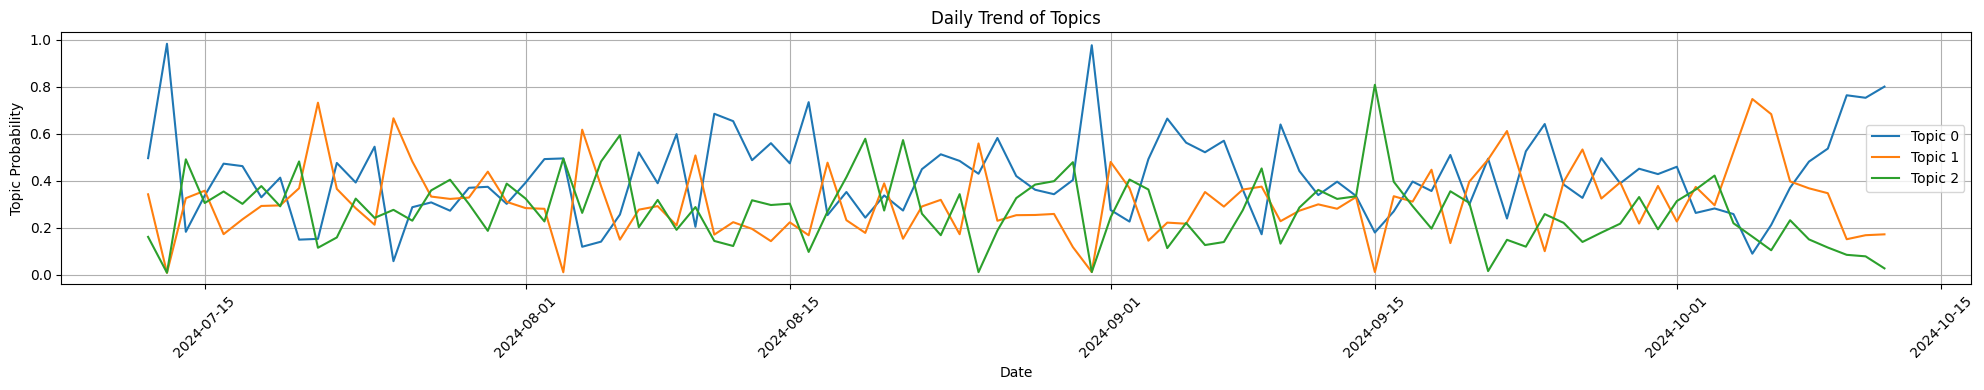

In [ ]:
# prompt : 일자별로 각 토픽의 추세를 보여주는 시각화

# Assuming 'df' is your DataFrame with '일자' as index and topic probabilities
# Example: df['topic_0_prob'], df['topic_1_prob'], df['topic_2_prob']

# Resample the data to daily frequency (if needed)
# Select only numeric columns for calculating the mean
df_daily = df.select_dtypes(include=np.number).resample('D').mean()

plt.figure(figsize=(20, 4))

# Plotting each topic's trend
plt.plot(df_daily.index, df_daily['topic_0_prob'], label='Topic 0')
plt.plot(df_daily.index, df_daily['topic_1_prob'], label='Topic 1')
plt.plot(df_daily.index, df_daily['topic_2_prob'], label='Topic 2')


plt.xlabel('Date')
plt.ylabel('Topic Probability')
plt.title('Daily Trend of Topics')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### 감성분석